# PyTorch Digits Example
This example classifies the digit dataset using a neural net. Compared to the minimal notebook the changes are:
1. Load the digits dataset. For more details on the dataset, check [this](https://github.com/pabair/ml-kurs/blob/master/2_Logistische_Regression.ipynb) notebook.
2. Change the input and output size of the neural network (input is 64, output is 10).


### 0. Preamble

In [30]:
import numpy as np
import torch
import torch.nn.functional as F
import torch.nn as nn
import matplotlib.pyplot as plt

torch.manual_seed(1)
np.random.seed(1)

In [31]:
if(torch.cuda.is_available()):
  processing_chip = "cuda:0"
  print(f"{torch.cuda.get_device_name(0)} available")
else:
  processing_chip = "cpu"
  print("No GPU available")

device = torch.device(processing_chip)
device

No GPU available


device(type='cpu')

### 1. Data Preperation

In [32]:
from sklearn.datasets import load_digits
data, labels = load_digits(return_X_y = True)

In [33]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(data, labels, test_size=0.2, random_state=0)

In [34]:
X_train

array([[ 0.,  0.,  0., ..., 16., 16.,  6.],
       [ 0.,  3., 12., ..., 16.,  2.,  0.],
       [ 0.,  1., 10., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  4., ...,  0.,  0.,  0.],
       [ 0.,  0.,  6., ..., 11.,  0.,  0.]])

In [35]:
train_x = torch.Tensor(train_X).float().to(device)
test_x = torch.Tensor(test_X).float().to(device)
train_y = torch.Tensor(train_y).long().to(device)
test_y = torch.Tensor(test_y).long().to(device)

### 2. Model definition 


In [36]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.hidden1 = nn.Linear(64, 5)
    self.hidden2 = nn.Linear(5, 7)  
    self.output = nn.Linear(7, 10)

  def forward(self, x):
    z = F.relu(self.hidden1(x))
    z = F.relu(self.hidden2(z))
    z = self.output(z)  # no softmax. see CrossEntropyLoss() 
    return z

### 3. Model Training

In [37]:
# create network, move it to device and set it to training-mode
net = Net().to(device)
net.train()

# define the parameters for training
no_epochs = 500
learning_rate = 0.04
loss_func = nn.CrossEntropyLoss()  # applies softmax() internally
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

print("\nStarting training ")

train_losses = []
for epoch in range(0, no_epochs):

  optimizer.zero_grad()
  output = net(train_x)

  loss = loss_func(output, train_y)
  loss.backward()
  optimizer.step()

  train_losses.append(loss.item())
  
  if epoch % 10 == 0:
    print(f"Loss in epoch {epoch} is {loss.item()}")

print("Done training ")


Starting training 
Loss in epoch 0 is 2.483743906021118
Loss in epoch 10 is 2.1807913780212402
Loss in epoch 20 is 2.01027774810791
Loss in epoch 30 is 1.8581128120422363
Loss in epoch 40 is 1.6804238557815552
Loss in epoch 50 is 1.5361089706420898
Loss in epoch 60 is 1.4206675291061401
Loss in epoch 70 is 1.3116878271102905
Loss in epoch 80 is 1.2500494718551636
Loss in epoch 90 is 1.1599006652832031
Loss in epoch 100 is 1.100775122642517
Loss in epoch 110 is 1.0240036249160767
Loss in epoch 120 is 0.9701407551765442
Loss in epoch 130 is 0.8882778882980347
Loss in epoch 140 is 0.8448326587677002
Loss in epoch 150 is 0.7773168087005615
Loss in epoch 160 is 0.7421864867210388
Loss in epoch 170 is 0.6767240166664124
Loss in epoch 180 is 0.7762953042984009
Loss in epoch 190 is 0.5730281472206116
Loss in epoch 200 is 0.5403566956520081
Loss in epoch 210 is 0.5515676736831665
Loss in epoch 220 is 0.5390246510505676
Loss in epoch 230 is 0.4891301393508911
Loss in epoch 240 is 0.471425771713

Text(0, 0.5, 'loss')

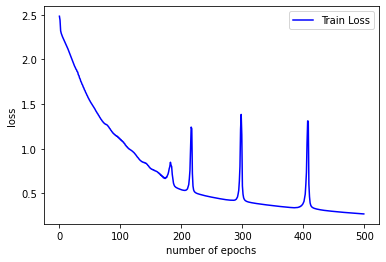

In [38]:
  fig = plt.figure()
  plt.plot(range(0, no_epochs), train_losses, color='blue')
  plt.legend(['Train Loss'], loc='upper right')
  plt.xlabel('number of epochs')
  plt.ylabel('loss')

### 4. Model Evaluation

In [39]:
net.eval() # set network to evaluation mode
y_pred = net(test_x)
_, predicted = torch.max(y_pred.data, 1)
correct = (predicted == test_y).sum().item()
print(f"Accuarcy is {100. * correct / len(test_x)}%")

Accuarcy is 90.55555555555556%
